In [1]:
import numpy as np
import matplotlib.pyplot as plt

import IPython
import scipy.io.wavfile as wav
import scipy.signal as ss

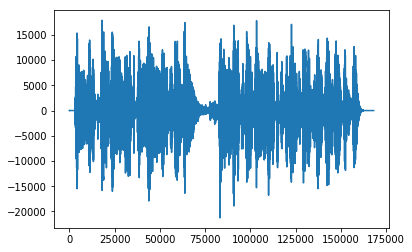

In [14]:
sons = ["./Sons/guitare.wav", "./Sons/hand_clap_22mono.wav", "./Sons/paganini.wav"]
frameRate, frames = wav.read(sons[0])

plt.plot(frames)
plt.show()

IPython.display.Audio(frames, rate=frameRate)

In [70]:
phasingEffect = {
    "fa": 2,
    "aminmax": (0, 1),
    "p": 20
}

def phasing(signal, fa=2, aminmax=(0, 1), p=10):
    x = np.arange(len(signal))
    am, aM = aminmax
    a = (am + aM) / 2 + (aM - am) / 2 * np.sin(2 * np.pi * fa * x)
    
    delayed = 1 + a * np.fft.fft(signal) ** (-p)
    return np.real(np.fft.ifft(np.fft.fft(signal) + delayed))

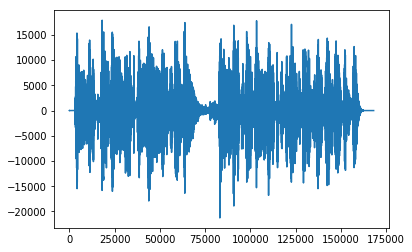

In [71]:
phased = phasing(frames.astype(np.float), **phasingEffect)

plt.plot(phased)
plt.show()

IPython.display.Audio(frames, rate=frameRate)

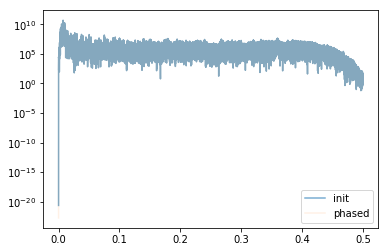

In [58]:
plt.semilogy(*ss.periodogram(frames), alpha=.6, label="init")
plt.semilogy(*ss.periodogram(phased), alpha=.1, label="phased")
plt.legend()
plt.show()

In [62]:
(frames == phased.astype(np.int)).mean()

0.525679470703032